In [5]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,log_loss


In [6]:
df=pd.read_csv("happydata.csv")
df

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
...,...,...,...,...,...,...,...
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0


In [7]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
...,...,...,...,...,...,...,...
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0


In [8]:
x=df.drop(columns="happy")
y=df["happy"]
y

0      0
1      0
2      1
3      0
4      0
      ..
138    0
139    1
140    1
141    0
142    0
Name: happy, Length: 143, dtype: int64

In [9]:
stand=StandardScaler()
X=stand.fit_transform(x)
X

array([[-1.64950362,  0.41421869, -0.26866028,  0.33966898, -1.432491  ,
        -0.25632969],
       [-1.64950362, -0.48325514, -0.26866028,  1.46926582,  0.34106929,
        -1.43875373],
       [ 0.85984763,  0.41421869, -0.26866028, -0.78992786, -0.54571086,
         0.92609436],
       [ 0.85984763,  1.31169252, -0.26866028, -0.78992786, -0.54571086,
         0.92609436],
       [ 0.85984763,  1.31169252, -0.26866028, -0.78992786, -0.54571086,
         0.92609436],
       [ 0.85984763,  2.20916635, -0.26866028,  1.46926582,  1.22784943,
         0.92609436],
       [-1.64950362, -1.38072897, -1.27967134, -1.9195247 , -2.31927114,
        -1.43875373],
       [ 0.85984763,  1.31169252,  0.74235078,  0.33966898,  0.34106929,
         0.92609436],
       [-0.39482799, -1.38072897,  0.74235078,  0.33966898,  0.34106929,
        -0.25632969],
       [-0.39482799,  1.31169252,  0.74235078, -1.9195247 ,  1.22784943,
         0.92609436],
       [-1.64950362, -0.48325514, -0.26866028, -0.

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
model=Sequential()
model.add(Dense(320,activation="relu"))
model.add(Dense(160,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(1,activation="sigmoid"))




In [13]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [14]:
early=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

In [15]:
history=model.fit(
    x_train,y_train,
    verbose=1,
    epochs=20,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early]
    )



Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4615 - loss: 0.7029 - val_accuracy: 0.6522 - val_loss: 0.6740
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5604 - loss: 0.6868 - val_accuracy: 0.6087 - val_loss: 0.6694
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6154 - loss: 0.6734 - val_accuracy: 0.6087 - val_loss: 0.6632
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6703 - loss: 0.6612 - val_accuracy: 0.5652 - val_loss: 0.6572
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.6703 - loss: 0.6506 - val_accuracy: 0.5652 - val_loss: 0.6516
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7143 - loss: 0.6407 - val_accuracy: 0.5652 - val_loss: 0.6468
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7253 - loss: 0.6307 - val_accuracy: 0.6087 - val_loss: 0.6423
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7253 - loss: 0.6211 - val_accuracy: 0.6087 - val_loss: 0.6386


In [16]:
loss,accuracy=model.evaluate(x_test,y_test)
print("loss:",loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5862 - loss: 0.6398
loss: 0.639773428440094


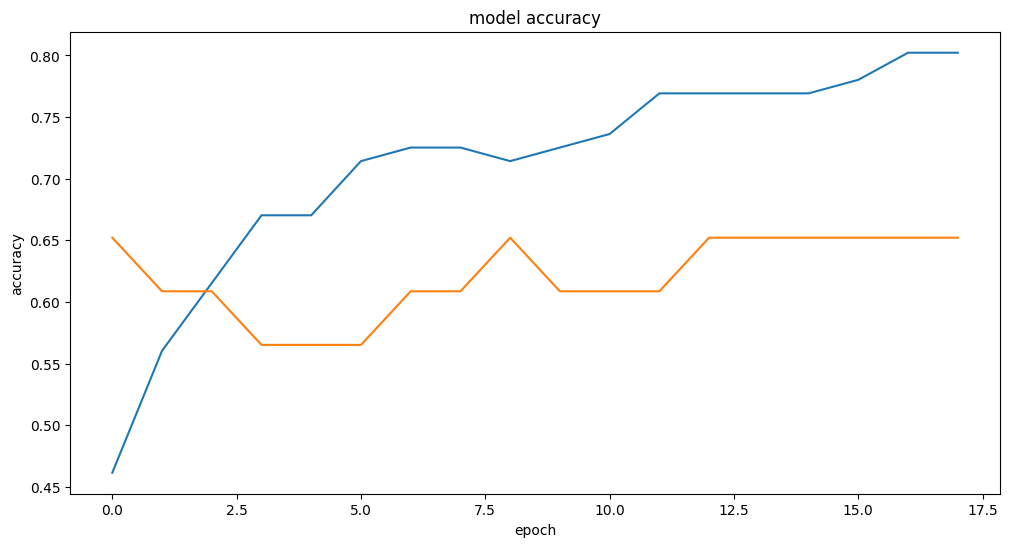

In [17]:
plt.figure(figsize=(12,6))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy") 
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [19]:
new=np.array([[0,0,1,1,1,1]])
new=stand.transform(new)
pred=model.predict(new)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[0.12296979]]


c:\Users\AKASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
